In [ ]:
# COMMAND: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import gradio as gr
import cv2


In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 120.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.7 MB/s eta 0:00:00


In [ ]:

# COMMAND: Load Dataset
data = pd.read_csv('/content/Dataset.csv')
print("Dataset Shape:", data.shape)
data.head()

Dataset Shape: (4648, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Number of features per sample:", X.shape[1])


Number of features per sample: 783


In [ ]:
print(data.columns)  # See what columns are present


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [ ]:
# Pad one column to reach 784 features
X = data.drop('label', axis=1).copy()
X['pixel784'] = 0  # Add dummy pixel
X = X.values


In [ ]:
y = data['label'].values
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)


In [ ]:
# Add missing pixel column with zeros
X = data.drop('label', axis=1).copy()
X['pixel784'] = 0  # Add dummy pixel to make total 784
X = X.values

# Labels
y = data['label'].values

# Normalize and reshape
X = X / 255.0
X = X.reshape(-1, 28, 28, 1)

# One-hot encode
y_cat = to_categorical(y, num_classes=10)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)


Dataset Shape: (4648, 784)
Missing values:
 label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64


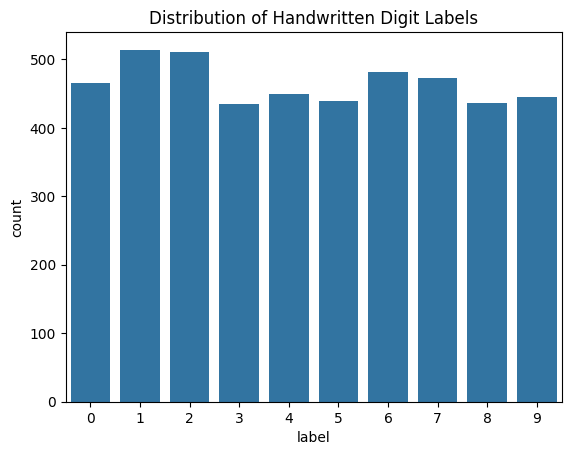

In [ ]:
# COMMAND: Load Dataset
data = pd.read_csv('/content/Dataset.csv')
print("Dataset Shape:", data.shape)
data.head()

# COMMAND: EDA - Check for Missing Values
print("Missing values:\n", data.isnull().sum())

# COMMAND: EDA - Distribution of Labels
sns.countplot(x=data['label'])
plt.title('Distribution of Handwritten Digit Labels')
plt.show()

# COMMAND: Feature and Label Separation
X = data.drop('label', axis=1).copy()

# Fix: Add missing pixel to reach 784 total pixels
X['pixel784'] = 0

# Convert to NumPy array
X = X.values
y = data['label'].values

# COMMAND: Normalize Features
X = X / 255.0

# COMMAND: Reshape Features for CNN Input
X = X.reshape(-1, 28, 28, 1)

# COMMAND: One-hot Encode Labels
y_cat = to_categorical(y, num_classes=10)

# COMMAND: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [ ]:
# COMMAND: Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.5014 - loss: 1.5022 - val_accuracy: 0.9151 - val_loss: 0.2925
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.8794 - loss: 0.3780 - val_accuracy: 0.9366 - val_loss: 0.2087
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9304 - loss: 0.2490 - val_accuracy: 0.9602 - val_loss: 0.1353
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9399 - loss: 0.1834 - val_accuracy: 0.9667 - val_loss: 0.1128
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.9543 - loss: 0.1466 - val_accuracy: 0.9677 - val_loss: 0.1096
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9682 - loss: 0.1157 - val_accuracy: 0.9742 - val_loss: 0.0861
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9687 - loss: 0.1015 - val_accuracy: 0.9742 - val_loss: 0.0934
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9707 - loss: 0.0858 - val_accu

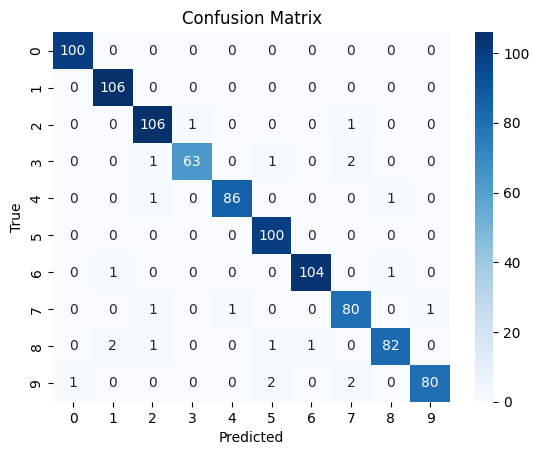

In [ ]:

# COMMAND: Train the Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# COMMAND: Evaluate the Model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

# COMMAND: Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes))

# COMMAND: Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


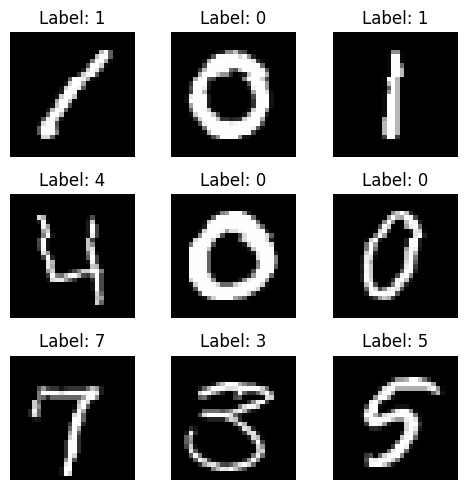

In [43]:
# Fix the shape by adding one missing pixel column
X_fixed = data.drop('label', axis=1).copy()
X_fixed['pixel784'] = 0  # Add a dummy pixel with value 0

# Convert to NumPy array
X_fixed = X_fixed.values
y = data['label'].values

plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_fixed[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(image_mode="RGB", sources=["upload", "webcam"]),
    outputs=gr.Label(num_top_classes=3),
    title="Handwritten Digit Recognizer"
)


In [44]:


# Make sure your model is loaded beforehand
# model = ...

def predict_digit(image):
    image = cv2.resize(image, (28, 28))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = 255 - image
    image = image / 255.0
    image = image.reshape(1, 28, 28, 1)
    prediction = model.predict(image)
    return {str(i): float(prediction[0][i]) for i in range(10)}

interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(image_mode="RGB", sources=["upload", "webcam"]),
    outputs=gr.Label(num_top_classes=3),
    title="Handwritten Digit Recognizer"
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0f4852709d112d4a59.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
